<a href="https://colab.research.google.com/github/abhishinde24/Data-science-projects/blob/main/Tasks_us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis

TODO - talk about the dataset (source, what it contains, how it will be useful)
- Kaggle
- US Accidents (3 million records -- updated)
A Countrywide Traffic Accident Dataset (2016 - 2020)
- informaiton about accidents
- can use useful to prevent accidents


In [1]:
pip install opendatasets --upgrade --quiet

In [2]:

import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abhishekshinde24
Your Kaggle Key: ··········


  3%|▎         | 9.00M/290M [00:00<00:03, 83.7MB/s]

100%|██████████| 290M/290M [00:02<00:00, 132MB/s]


In [3]:
data_filename = './us-accidents/US_Accidents_Dec20_Updated.csv'


### Data Preparation and Cleaning
1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv(data_filename)

In [6]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
# sns.heatmap(df.corr())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [10]:
df.shape

(2906610, 47)

### The state that has the highest number of accidents
Task Details.
- Which US state has the highest number of accidents, and a description of the accidents that usually occur in that state.

There are over 2.9 million records
- now check for any missing value

In [11]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

- no null values for states and ID column

In [12]:
group_state = df.groupby('State')['ID'].count().reset_index()

In [13]:
group_state_sort = group_state.sort_values('ID',ascending=False)
group_state_sort.head()

,State,ID
3,CA,730744
8,FL,263300
41,TX,226640
32,NY,126176
25,NC,122797


- CA has hightest rate of accidents

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

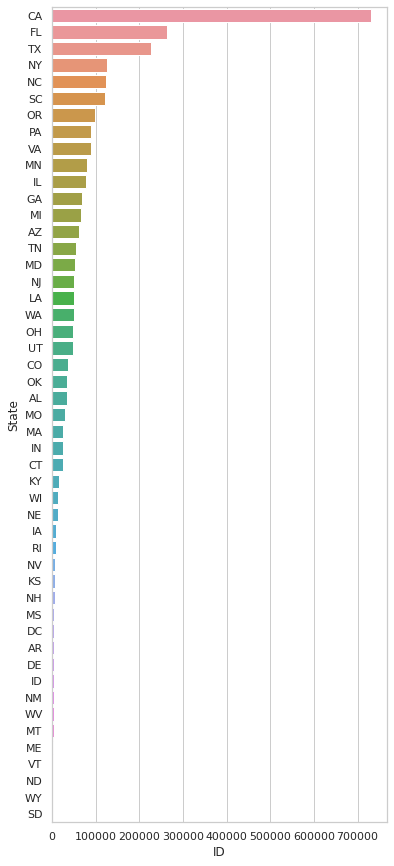

In [15]:
plt.figure(figsize=(6, 15))
sns.barplot(y="State", x="ID", data=group_state_sort)

### At what time do accidents usually occur in the US
Task Details
- Figure out the time that accidents usually occur in the US. This can be done by using the "start time" and "end time" columns.

In [16]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [17]:
dftime = df.copy()
dftime.drop(['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)','Precipitation(in)'], axis=1, inplace=True)
# dftime.dropna(axis=0)
dftime.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,N,7.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,VAR,3.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,W,6.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,SSW,4.6,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,SSE,13.8,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [18]:
dftime.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                        0
Side                          0
City                        108
County                        0
State                         0
Zipcode                    1114
Country                       0
Timezone                   3430
Airport_Code               6608
Weather_Timestamp         46917
Temperature(F)            67224
Humidity(%)               71270
Pressure(in)              56908
Visibility(mi)            72078
Wind_Direction            63474
Wind_Speed(mph)          307163
Weather_Condition         71851
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway 

In [19]:
dftime = dftime.dropna(axis =0)

In [20]:
dftime.isnull().any().sum()

0

In [21]:
dftime.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

#### Brief overview of data

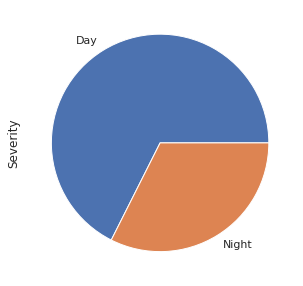

In [22]:
plt.figure(figsize =(10,5))
dftime.groupby(['Sunrise_Sunset'])['Severity'].size().sort_values(ascending=False).plot.pie()

- When do accidents happen the most at day as more people are out as above.

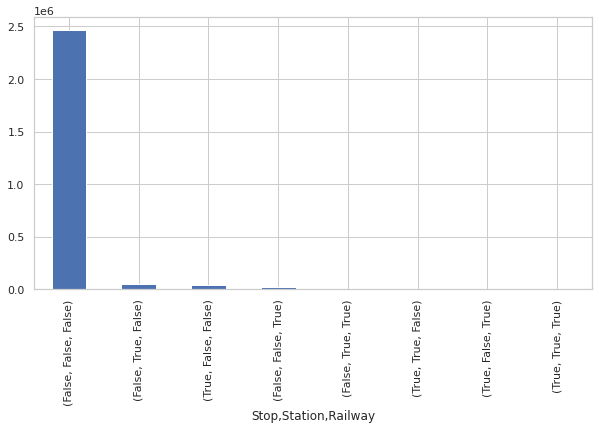

In [23]:
plt.figure(figsize =(10,5))
dftime.groupby(['Stop', 'Station', 'Railway' ])['Severity'].size().sort_values(ascending=False).plot.bar()

- When do accidents happen the most ? - They happen when the Stop sign, Station signs & railway crossings are not followed

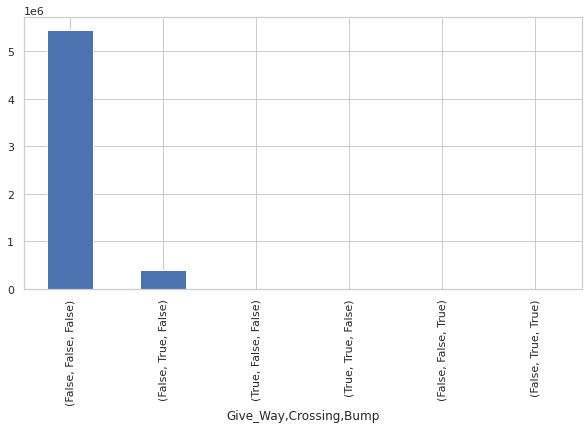

In [24]:
plt.figure(figsize =(10,5))
dftime.groupby(['Give_Way', 'Crossing','Bump' ])['Severity'].sum().sort_values(ascending=False).plot.bar()

- When do accidents happen the most ? -they happen when Give Way, Crossing & Bumps are not seen by the driver

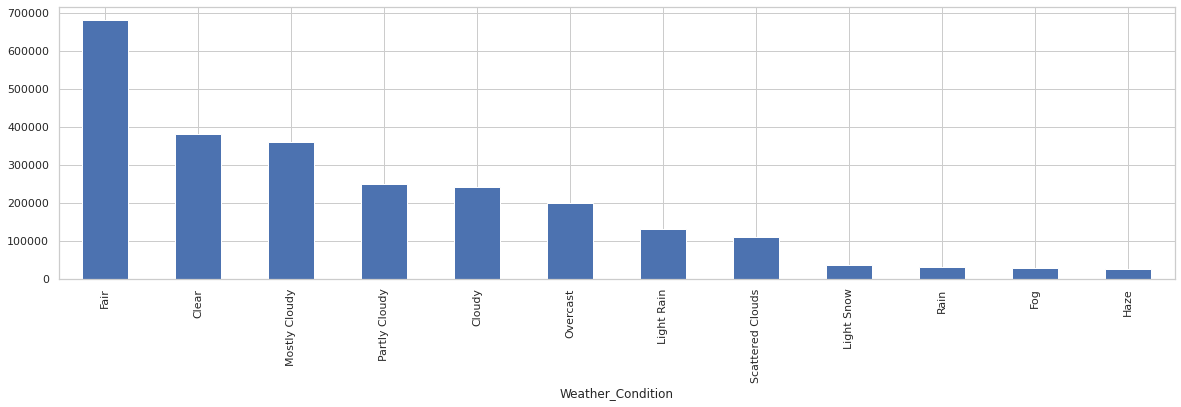

In [25]:
plt.figure(figsize =(20,5))
dftime.groupby(['Weather_Condition']).size().sort_values(ascending=False).head(12).plot.bar()


- How was the weather conditions during the accidents?




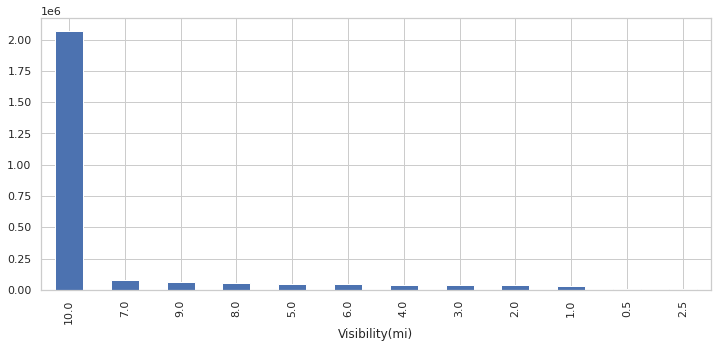

In [26]:
plt.figure(figsize =(12,5))
dftime.groupby(['Visibility(mi)']).size().sort_values(ascending=False).head(12).plot.bar()

- How was the visibility during accidents? - Max accidents happened when the visibiilty was >10 miles

- I have split the Start Time in different features like month, year, time, week day etc as example

In [27]:
import datetime
dftime['Start_Time']= pd.to_datetime(dftime['Start_Time'])
dftime['hour']= dftime['Start_Time'].dt.hour
dftime['year']= dftime['Start_Time'].dt.year
dftime['month']= dftime['Start_Time'].dt.month
dftime['week']= dftime['Start_Time'].dt.week
dftime['day']= dftime['Start_Time'].dt.day_name()
dftime['quarter']= dftime['Start_Time'].dt.quarter
dftime['time_zone']= dftime['Start_Time'].dt.tz
dftime['time']= dftime['Start_Time'].dt.time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [28]:
dftime.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,hour,year,month,week,day,quarter,time_zone,time
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,N,7.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,8,2019,5,21,Tuesday,2,None,08:29:55
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,VAR,3.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,17,2019,10,41,Monday,4,None,17:43:09
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,W,6.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,21,2020,12,50,Sunday,4,None,21:53:00
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,SSW,4.6,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,16,2018,4,16,Tuesday,2,None,16:51:23
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,SSE,13.8,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day,17,2016,8,35,Wednesday,3,None,17:40:49


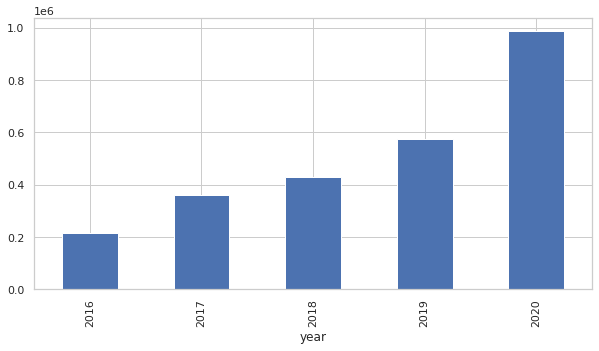

In [29]:
plt.figure(figsize =(10,5))
dftime.groupby(['year']).size().sort_values(ascending=True).plot.bar()

- How are the accident rates over the year? Increaseing........

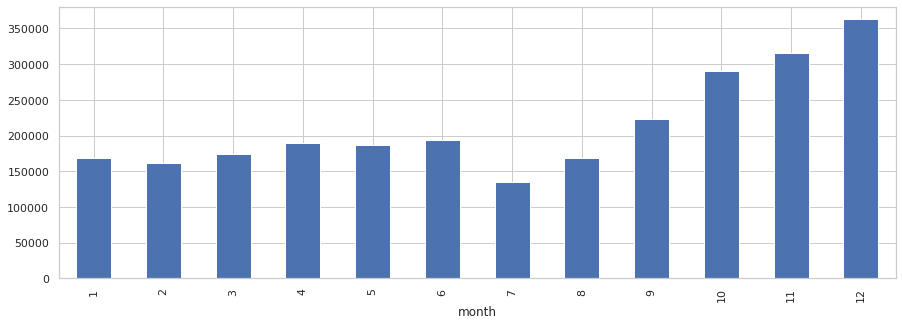

In [30]:
plt.figure(figsize =(15,5))
dftime.groupby(['month']).size().plot.bar()

Above you can see the month wise accident stats

Text(0, 0.5, 'number of accidents')

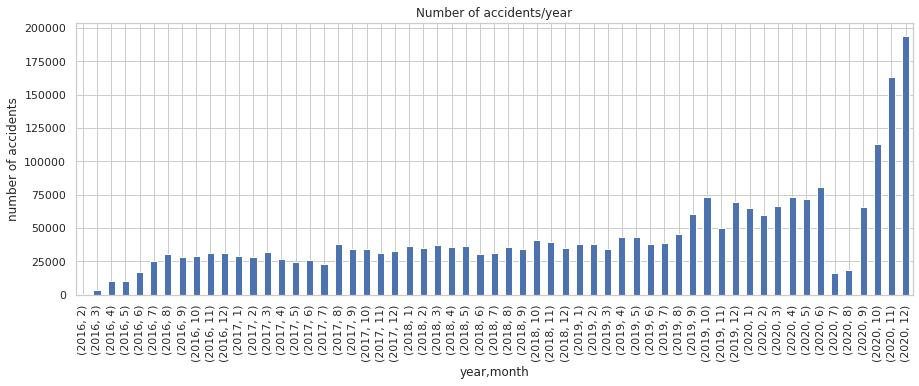

In [31]:
plt.figure(figsize =(15,5))
dftime.groupby(['year', 'month']).size().plot.bar()
plt.title('Number of accidents/year')
plt.ylabel('number of accidents')

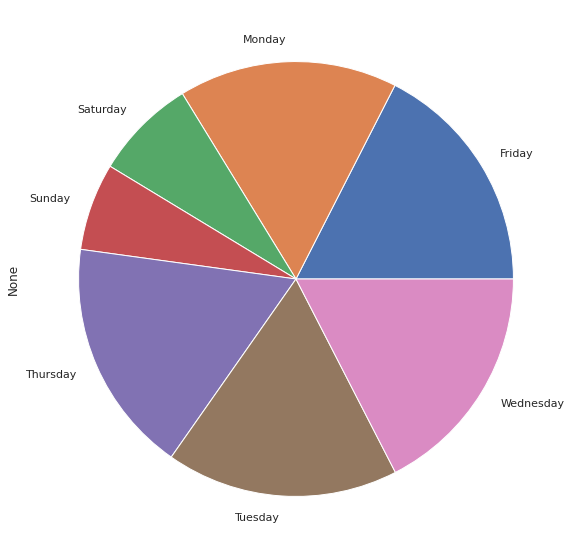

In [32]:
dftime.groupby(['day']).size().plot.pie(figsize=(10,10))

- from above we can see accidents are less no sunday and saturday as people are at home.

Text(0, 0.5, 'count of accidents')

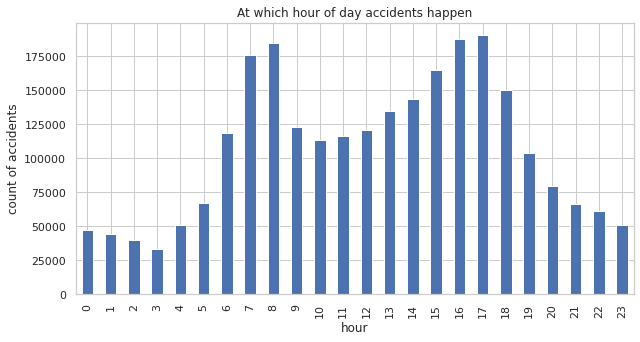

In [33]:
plt.figure(figsize =(10,5))
dftime.groupby(['hour']).size().plot.bar()
plt.title('At which hour of day accidents happen')
plt.ylabel('count of accidents')

- Above Graph Shows at which time of the day the accidents are maximum, early morning during the office going time

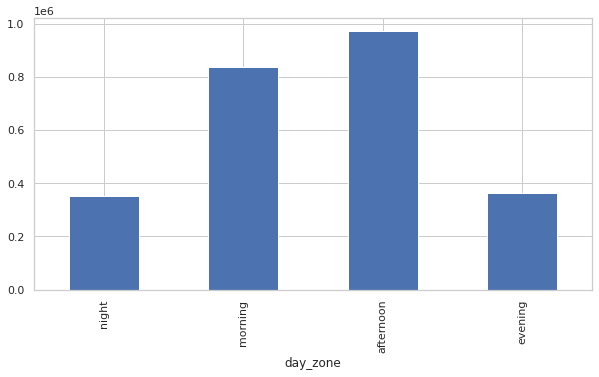

In [34]:
dftime['day_zone'] = pd.cut((dftime['hour']),bins=(0,6,12,18,24), labels=["night", "morning", "afternoon", "evening"])
plt.figure(figsize =(10,5))
dftime.groupby(['day_zone']).size().plot.bar()

- we have divided time into 4 time zone. 

### Visualize US Accidents Dataset
Task Details
- This is a countrywide traffic accident dataset, which covers 49 states of the United States. The purpose of this task is to visualize the dataset states wise.

- here some data pages with lat and lng

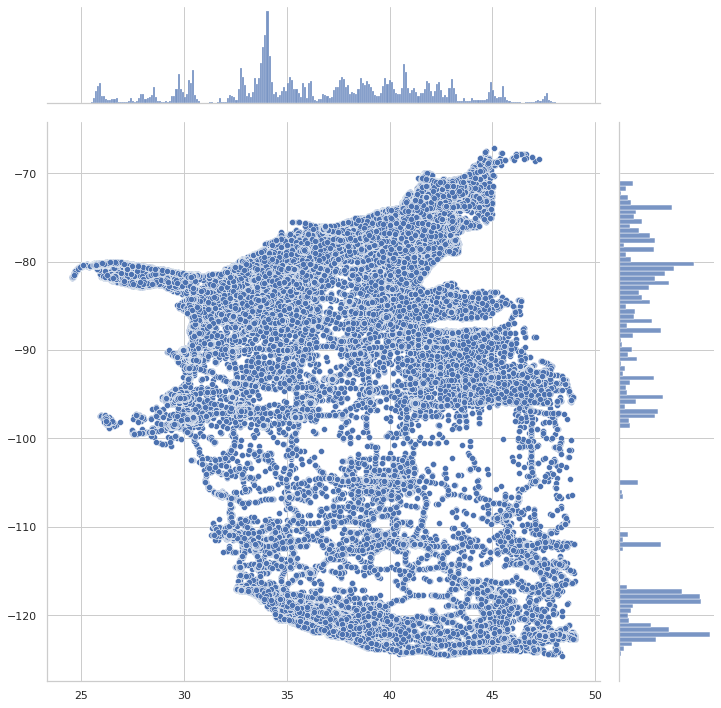

In [35]:
sns.jointplot(x=dftime.Start_Lat.values,y=dftime.Start_Lng.values,height=10)
plt.ylabel('Start_Lat', fontsize=12)
plt.xlabel('Start_Lng', fontsize=12)
plt.show()

In [36]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.7 MB/s 


In [37]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [38]:
init_notebook_mode(connected=True) #set up everything so that the figures show up in the notebook

In [39]:
df_st_ct = pd.value_counts(dftime['State'])
df_st_ct.head(5)

CA    632946
FL    242522
TX    202961
NY    114995
NC    108143
Name: State, dtype: int64

In [40]:
#creating data variable and layout variable
# dictionary casting
data = dict(type='choropleth',
            colorscale = 'amp',
            locations = df_st_ct.index,
            z = df_st_ct.values.astype(float),  # Data to be color-coded,
            locationmode = 'USA-states',
            text = df_st_ct,
            marker = dict(line = dict(color = 'rgb(0,0,0)',width = 1)),
            colorbar = {'title':"Millions USD"}
            ) 

In [41]:
#layout dictionary
layout = dict(
    title = 'US Accendents by state',
   geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
)

In [42]:
choromap2 = go.Figure(data = [data],layout = layout)
iplot(choromap2)

map is not displaying we have to correct it

### Factors Affecting Accident Severity
Task Details
- Examine the relationship between accident severity and other accident information such as time, weather, and location.

In [43]:
import numpy as np
df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


- We will examine the impact of 3 groups of factors on accident severity: time, weather, and infrastructure.

Severity "a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay)." Here is the distribution of the severity values.

In [44]:
df["Severity"].value_counts()

2    2129263
3     629452
4     119144
1      28751
Name: Severity, dtype: int64

- anaylising by months

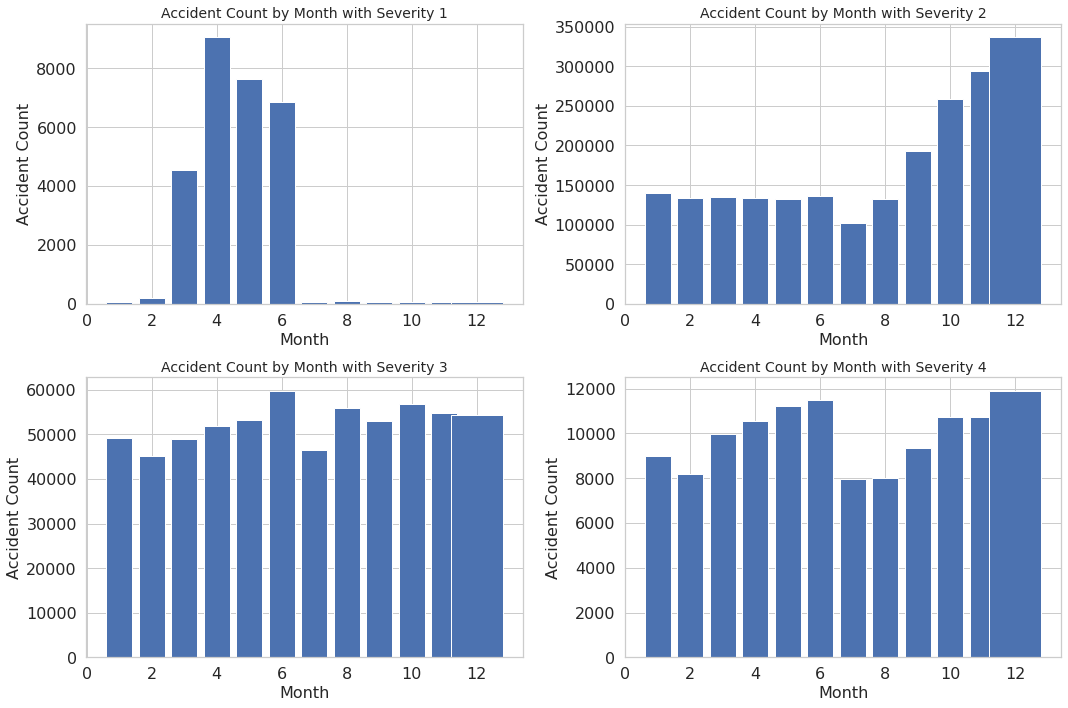

In [45]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')

plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(df.loc[df["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,14], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

-From july (1) to February (12) severity 1 is converted to higher severity as due to  wether conditions(snow). While fall and winter months could be more dangerous, it is interesting that January and February have much lower accident counts.
- analysis by days

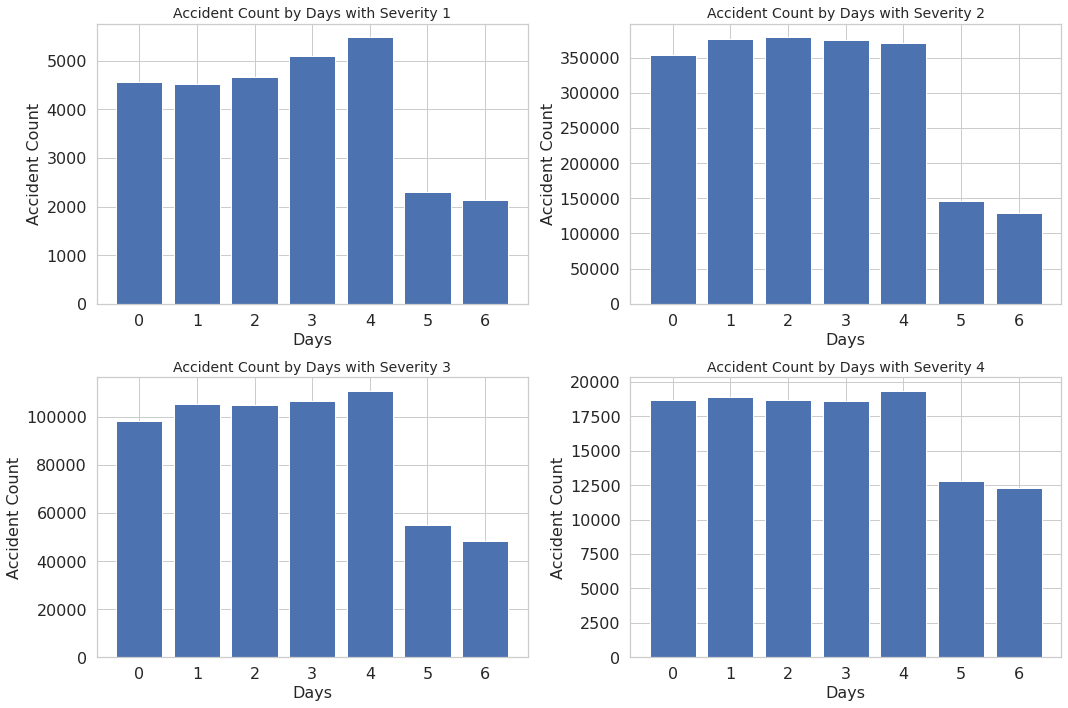

In [46]:
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(df.loc[df["Severity"] == s]['time']).dayofweek, bins=[0,1,2,3,4,5,6,7], align='left', rwidth=0.8)
    plt.title("Accident Count by Days with Severity " + str(s), fontsize=14)
    plt.xlabel("Days", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

- drop in number of accidents for all severity levels during the weekend.

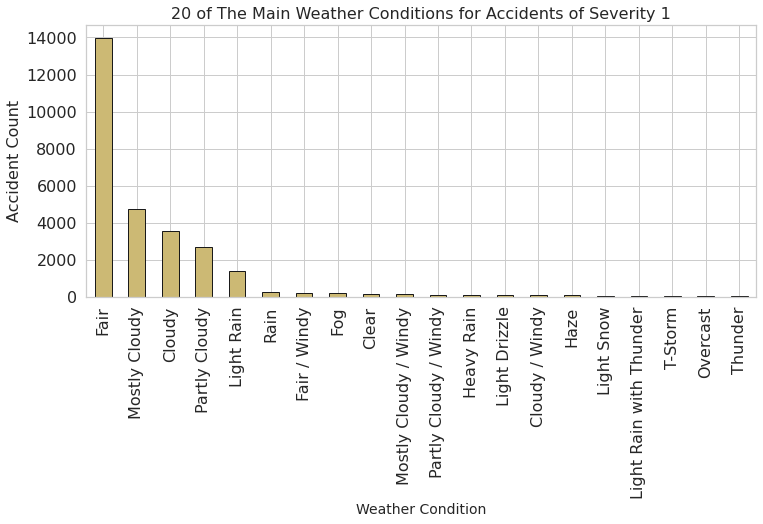

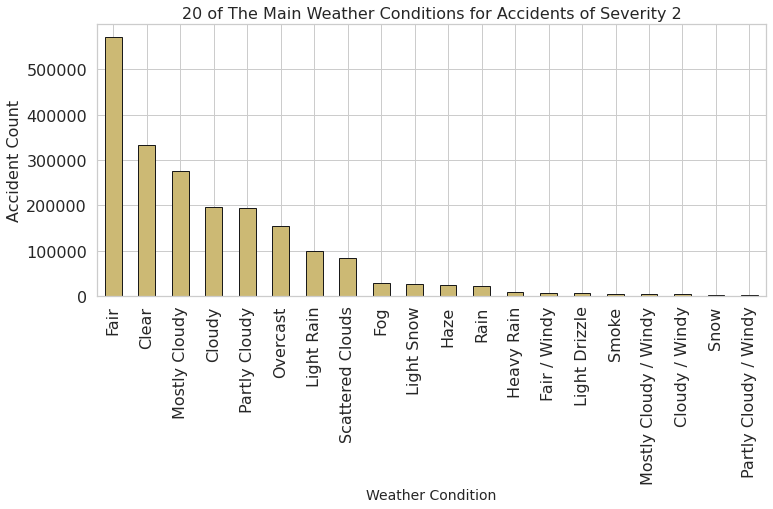

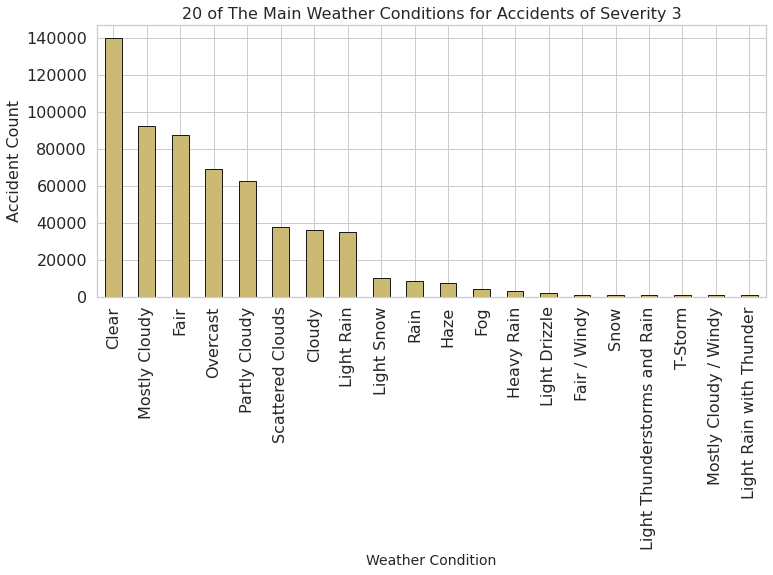

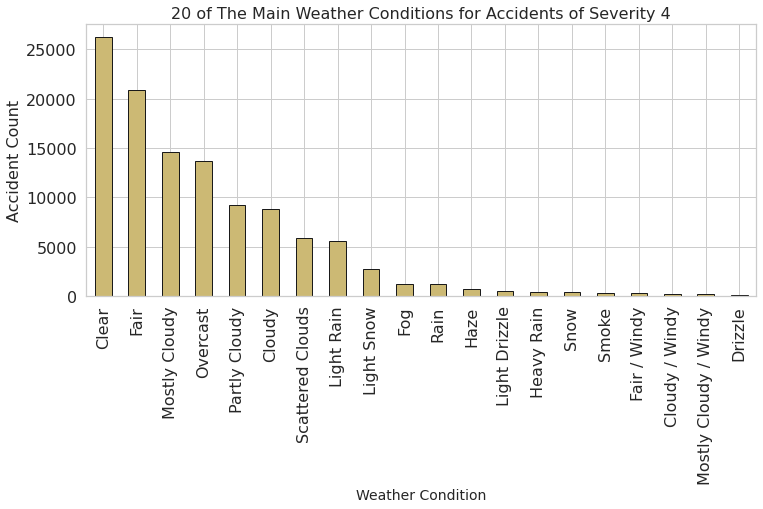

In [47]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=14)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

- Across all levels of severity, most accidents happen under clear, cloudy, fair or similar weather conditions. 

In [48]:
# df['Weather_Condition'].unique()

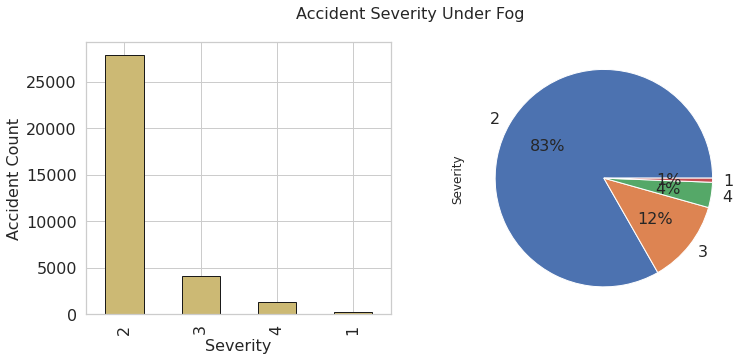

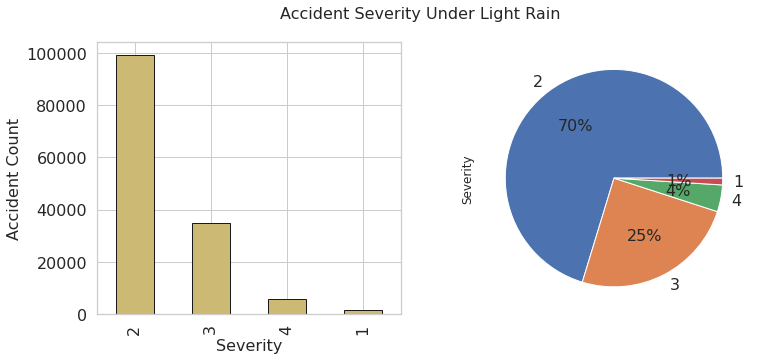

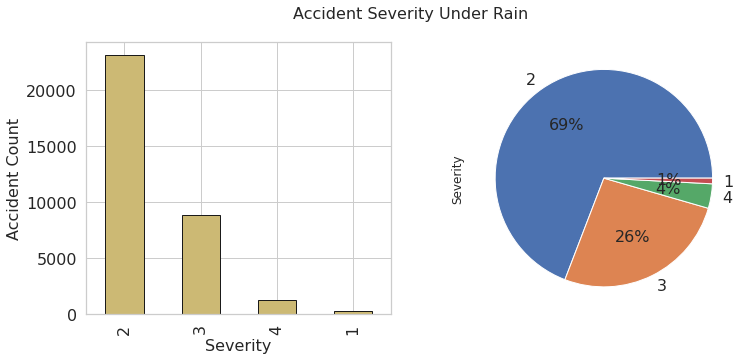

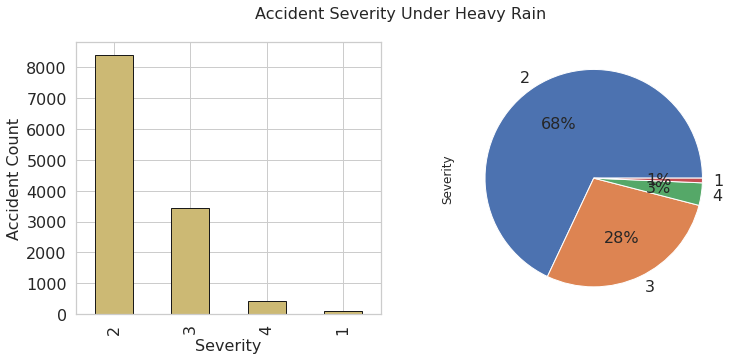

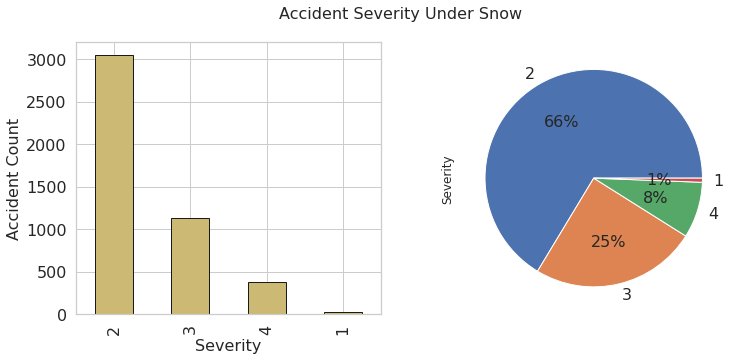

In [49]:
for s in ["Fog","Light Rain","Rain","Heavy Rain","Snow"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity Under ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

- The proportion of level 3 and 4 accidents increases as weather changes from fog (16%) to light rain (29%) to rain (30%) to heavy rain (31%) to snow (33%).

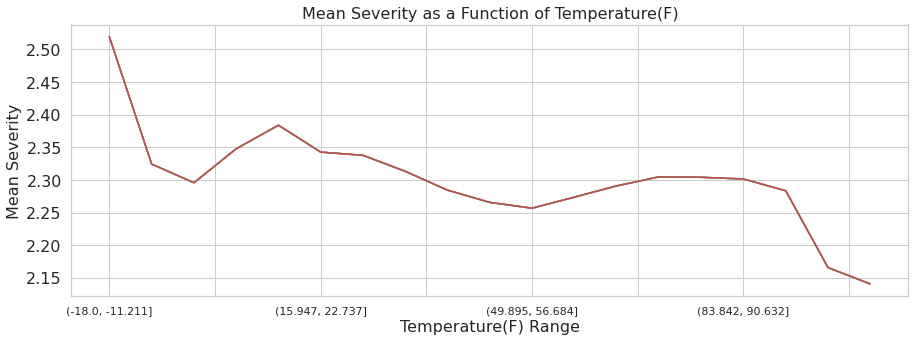

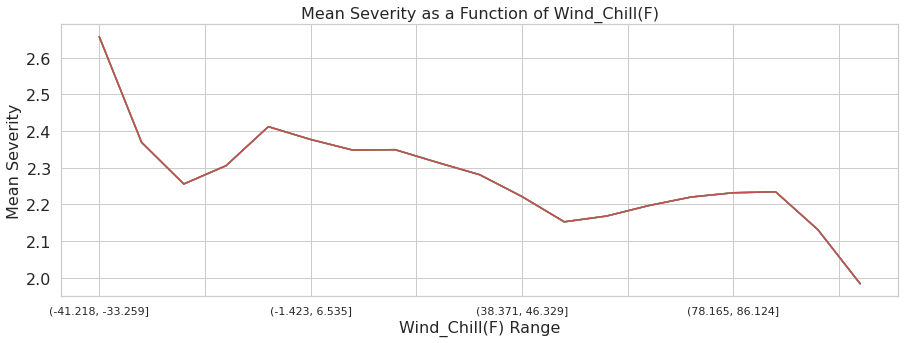

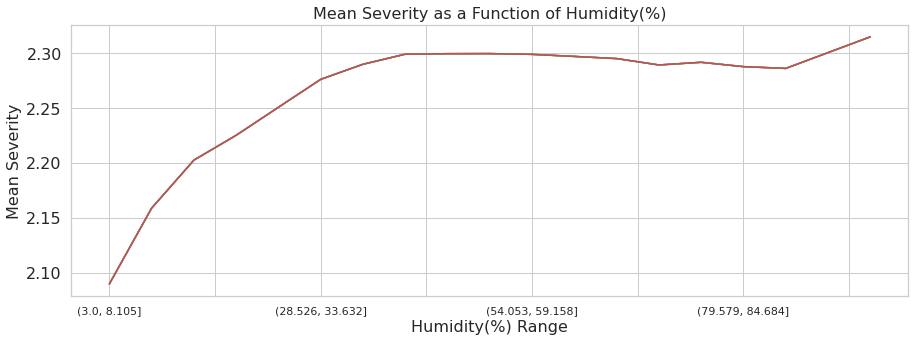

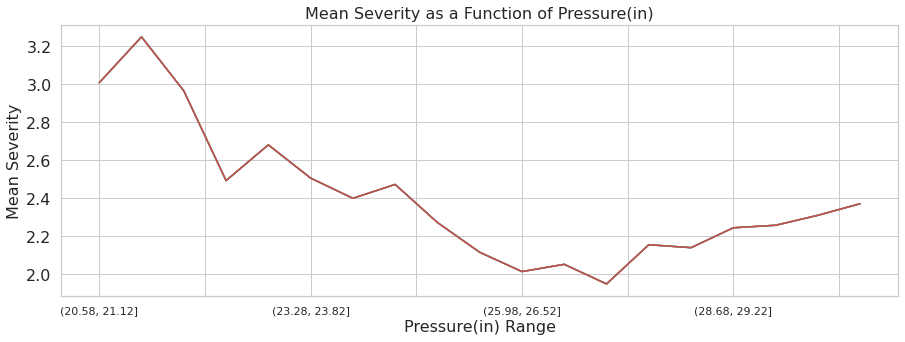

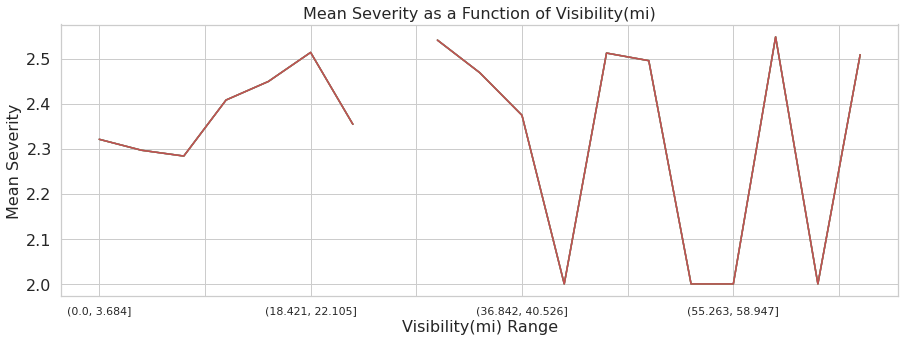

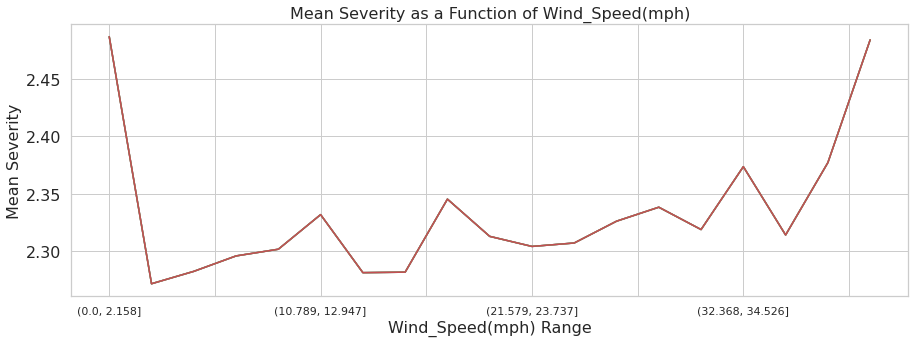

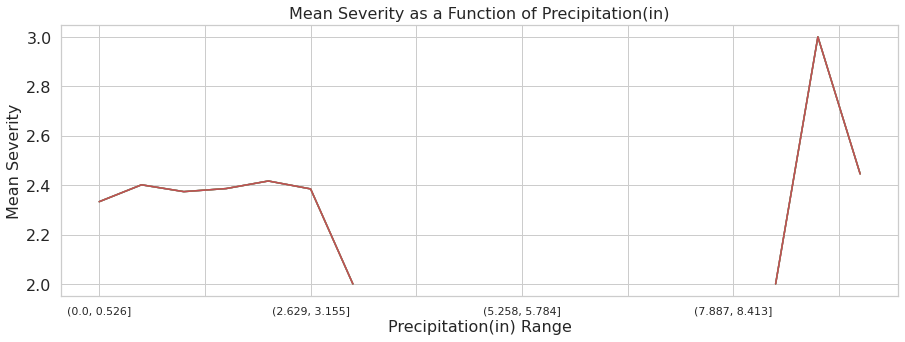

In [50]:
factors = ['Temperature(F)','Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

for factor in factors:
    # remove some of the extreme values
    factorMin = df[factor].quantile(q=0.0001)
    factorMax = df[factor].quantile(q=0.9999)
    # print df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).count()
    plt.subplots(figsize=(15,5))
    for s in np.arange(1,5):
        df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).mean().plot()
        plt.title("Mean Severity as a Function of " + factor, fontsize=16)
        plt.xlabel(factor + " Range", fontsize=16)
        plt.ylabel("Mean Severity", fontsize=16)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=16)

accidents near Infrastructure

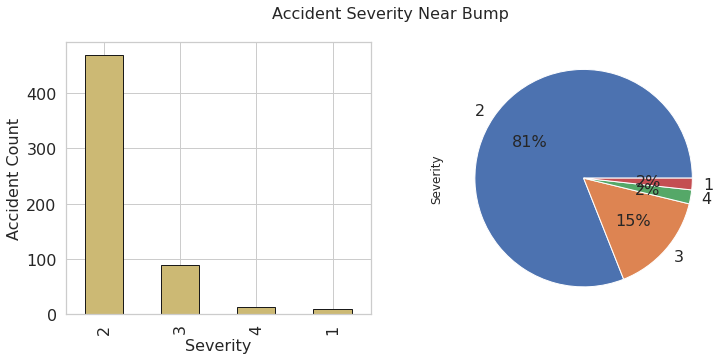

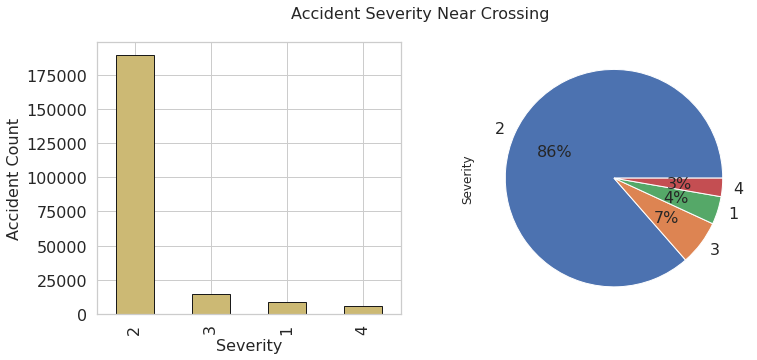

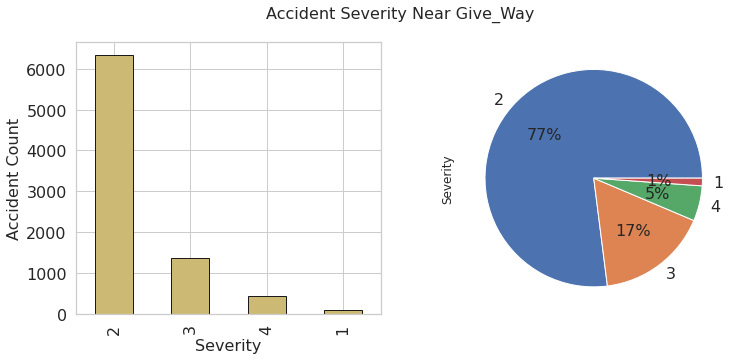

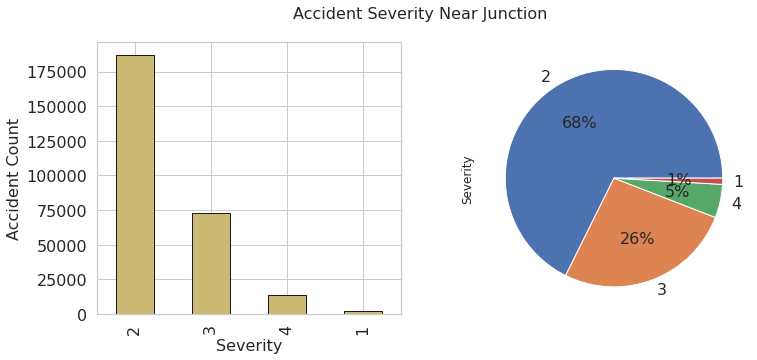

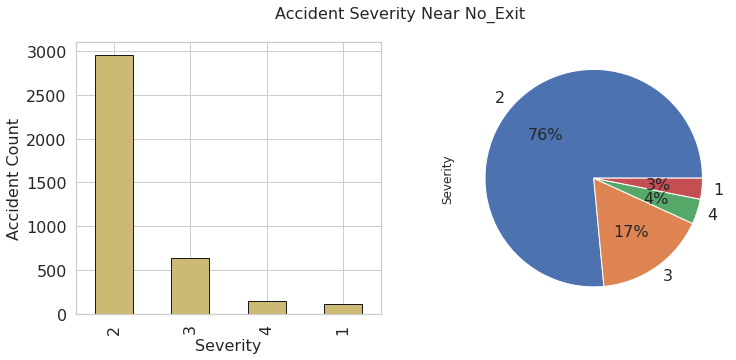

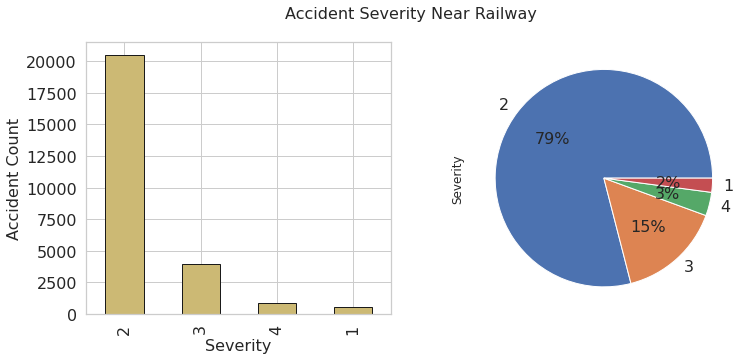

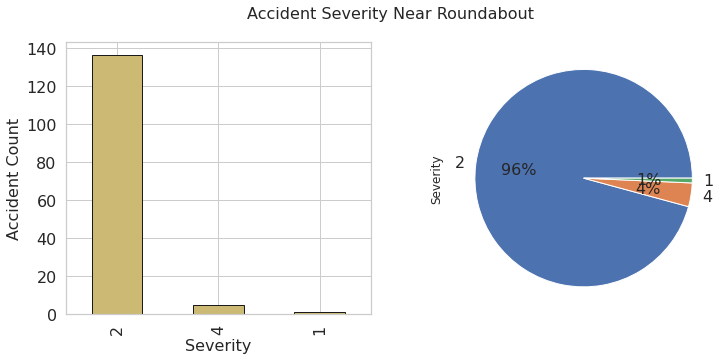

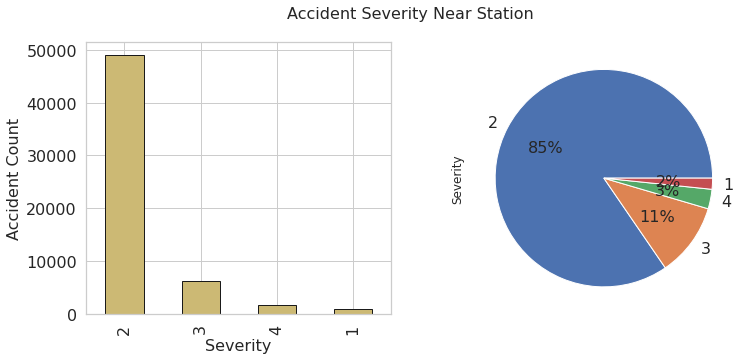

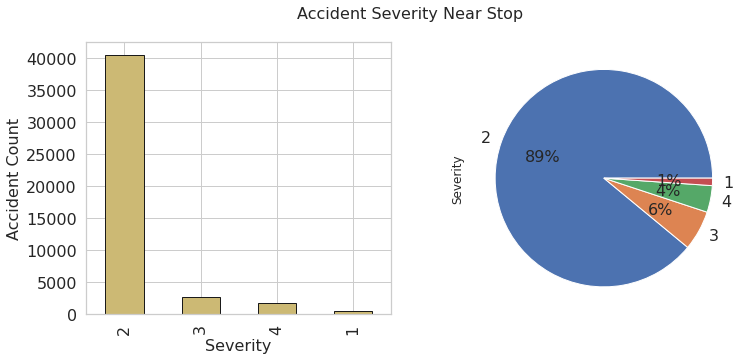

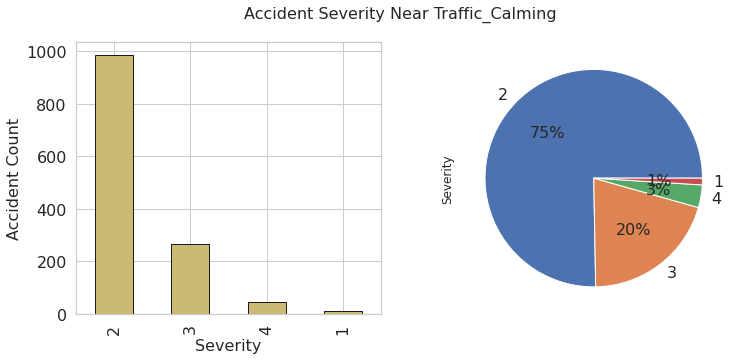

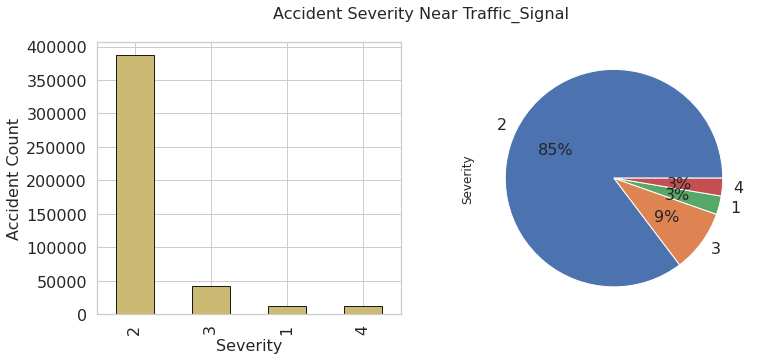

In [51]:
for s in ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']:
    # check if infrastructure type is found in any record 
    if (df[s] == True).sum() > 0:
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + s,fontsize=16)
        plt.subplot(1,2,1)
        df.loc[df[s] == True]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        df.loc[df[s] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)